In [ ]:
import pandas as pd

In [ ]:
file_url = "https://drive.google.com/file/d/1MxTrAJivTprYPkKMIdhIGcqAA6wr0BSC/view?usp=share_link" #구글드라이브 csv파일 이미지 주소
file_path='https://drive.google.com/uc?id=' + file_url.split('/')[-2] #'/'로 구분했을 때 url_path의 뒤에서 두번째 값이 공유된 파일의 고유값

print("공유파일 링크변환 경로명 : ", file_path)
mpg = pd.read_csv(file_path) #파일 불러오기

공유파일 링크변환 경로명 :  https://drive.google.com/uc?id=1MxTrAJivTprYPkKMIdhIGcqAA6wr0BSC


In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


반복문을 통한 시각화

In [ ]:
## 도화지 준비
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3, 2)

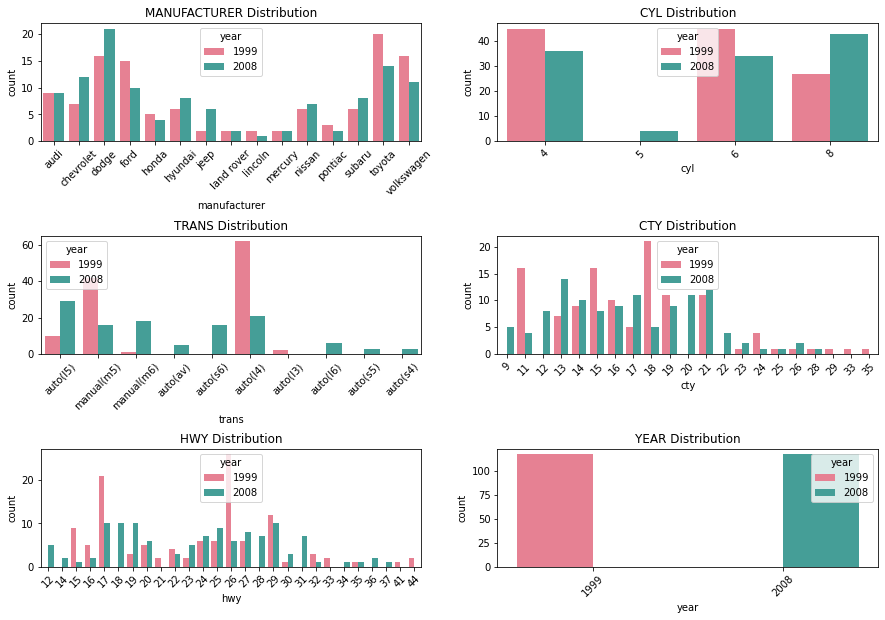

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.8)

mpg_features = ['manufacturer', 'cyl', 'trans', 'cty', 'hwy', 'year']

for idx, feature in enumerate(mpg_features): # enumerate를 통해 index와 value를 뽑아내어 각 plot에 순서대로 그릴 수 있도록 함
  ax = plt.subplot(grid[idx])
  sns.countplot(x = feature,
                data = mpg,
                hue = 'year',
                palette = 'husl',
                ax = ax)
  ax.set_title(f'{feature.upper()} Distribution') # f-string 방법을 통해 각 plot title을 지정
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45) # xlabel의 글자를 rotation 시켜 모든 글자가 보이도록 조정

### 외부 주가데이터 불러오기

In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

In [ ]:
df_krx = fdr.StockListing('KRX')
df_krx

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,61800,1,300,0.49,62100,62300,61100,9646327,595372614900,368932561590000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,469500,1,13500,2.96,456500,471500,450500,266206,123339592500,109863000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87600,1,2100,2.46,86300,87800,86100,2386074,207492408800,63773007174000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,800000,2,-1000,-0.12,797000,800000,794000,34432,27439120000,56939200000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,55900,1,400,0.72,55600,56000,55300,773354,43063575700,45999366530000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2686,308700,KR7308700004,테크엔,KONEX,일반기업부,559,1,49,9.61,439,559,439,153,67389,2236000000,4000000,KNX
2687,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2688,267810,KR7267810000,앙츠,KONEX,일반기업부,1035,4,132,14.62,903,1035,903,2404,2486112,1849545000,1787000,KNX
2689,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


In [ ]:
df_kospi = fdr.StockListing('KOSPI') # 코스피 종목 불러오기
df_kospi

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,61800,1,300,0.49,62100,62300,61100,9646327,595372614900,368932561590000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,469500,1,13500,2.96,456500,471500,450500,266206,123339592500,109863000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,87600,1,2100,2.46,86300,87800,86100,2386074,207492408800,63773007174000,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,800000,2,-1000,-0.12,797000,800000,794000,34432,27439120000,56939200000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,55900,1,400,0.72,55600,56000,55300,773354,43063575700,45999366530000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,002785,KR7002781003,진흥기업우B,KOSPI,,4975,3,0,0.00,4955,4975,4955,7170,35588800,4264659550,857218,STK
939,001527,KR7001522002,동양2우B,KOSPI,,13400,1,300,2.29,13400,13450,13100,193,2572900,4134824600,308569,STK
940,001525,KR7001521004,동양우,KOSPI,,6540,3,0,0.00,6550,6590,6540,834,5464090,4039960740,617731,STK
941,002787,KR7002782001,진흥기업2우B,KOSPI,,13250,2,-100,-0.75,13200,13450,13200,67,887350,3906206000,294808,STK


In [ ]:
df_kosdaq = fdr.StockListing('KOSDAQ') # 코스닥 종목 불러오기
df_kosdaq

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,247540,KR7247540008,에코프로비엠,KOSDAQ GLOBAL,우량기업부,99400,1,1900,1.95,97500,99500,97100,381727,37701600100,9721453593600,97801344,KSQ
1,091990,KR7091990002,셀트리온헬스케어,KOSDAQ GLOBAL,우량기업부,58100,2,-200,-0.34,58000,58500,57500,221930,12844453200,9193878908200,158242322,KSQ
2,066970,KR7066970005,엘앤에프,KOSDAQ GLOBAL,중견기업부,180300,1,2300,1.29,177500,180700,175500,208547,37291566300,6494102374800,36018316,KSQ
3,293490,KR7293490009,카카오게임즈,KOSDAQ GLOBAL,우량기업부,45250,1,250,0.56,44900,45600,44800,307660,13935327500,3723620101750,82289947,KSQ
4,028300,KR7028300002,HLB,KOSDAQ,중견기업부,31050,2,-150,-0.48,31000,31400,30900,209051,6502948200,3616265853450,116465889,KSQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,373340,KR7373340009,유진스팩6호,KOSDAQ,SPAC(소속부없음),2115,2,-50,-2.31,2145,2190,2100,27795,58565175,6387300000,3020000,KSQ
1612,08537M,KR708537K039,루트로닉3우C,KOSDAQ,중견기업부,31650,1,2850,9.90,29950,31650,29950,2363,71178100,6386178750,201775,KSQ
1613,050540,KR7050540004,엠피씨플러스,KOSDAQ,투자주의환기종목(소속부없음),822,0,0,0.00,0,0,0,0,0,4207455498,5118559,KSQ
1614,021045,KR7021041009,대호특수강우,KOSDAQ,중견기업부,9480,1,80,0.85,9320,9480,9320,384,3602060,4021852080,424246,KSQ


In [ ]:
df_nasdaq = fdr.StockListing('NASDAQ') # 나스닥 종목 불러오기
df_nasdaq

100%|██████████| 4432/4432 [00:43<00:00, 100.75it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
...,...,...,...,...
4427,HUAK,Huake Holding Biology Co Ltd Class A,식품 및 담배,541020
4428,HUDAR,Hudson Acquisition I Rights,기타 금융업,556010
4429,MCLDP,mCloud Technologies 9 00 Cumulative Perpetual ...,소프트웨어 및 IT서비스,572010
4430,PLTNR,Plutonian Acquisition Rights,기타 금융업,556010


In [ ]:
df_samsung = fdr.DataReader('005930', '2020') # 2020년부터 삼성전자의 데이터 출력
df_samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2023-01-16,61300,61600,60800,61100,10039972,0.004934
2023-01-17,61200,61500,60600,61000,9831456,-0.001637
2023-01-18,60700,61000,59900,60400,11584041,-0.009836


In [ ]:
df_apple = fdr.DataReader('AAPL', '2020')
df_apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.561531,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.846375,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.426834,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.081505,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.257103,132079200
...,...,...,...,...,...,...
2023-01-17,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
2023-01-18,136.820007,138.610001,135.029999,135.210007,135.210007,69672800
2023-01-19,134.080002,136.250000,133.770004,135.270004,135.270004,58280400


In [ ]:
df_kospi_index = fdr.DataReader('KS11', '2020') # 2020년 이후의 kospi 지수 데이터 
df_kospi_index

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,2201.209961,2202.320068,2171.840088,2175.169922,2175.169922,494700
2020-01-03,2192.580078,2203.379883,2165.389893,2176.459961,2176.459961,631600
2020-01-06,2154.969971,2164.419922,2149.949951,2155.070068,2155.070068,592700
2020-01-07,2166.600098,2181.620117,2164.270020,2175.540039,2175.540039,568200
2020-01-08,2156.270020,2162.320068,2137.719971,2151.310059,2151.310059,913800
...,...,...,...,...,...,...
2023-01-16,2390.060059,2410.219971,2387.610107,2399.860107,2399.860107,517800
2023-01-17,2400.919922,2404.000000,2374.649902,2379.389893,2379.389893,536000
2023-01-18,2380.360107,2383.000000,2356.840088,2368.320068,2368.320068,536200


In [ ]:
df_etf = fdr.StockListing('ETF/KR') # 한국 eft 종목 불러오기, JP, US 가능
df_etf

,Symbol,Name
0,069500,KODEX 200
1,357870,TIGER CD금리투자KIS(합성)
2,423160,KODEX KOFR금리액티브(합성)
3,371460,TIGER 차이나전기차SOLACTIVE
4,273130,KODEX 종합채권(AA-이상)액티브
...,...,...
663,433870,ARIRANG TDF2050액티브
664,315480,KBSTAR 200커뮤니케이션서비스
665,287330,KBSTAR 200생활소비재
666,284990,KBSTAR 200에너지화학


https://seong6496.tistory.com/169 참고